<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/Fashion_Mnist_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T_shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [4]:
with open('label.txt', 'w') as f:
  f.write('\n'.join(class_names))


In [5]:
train_x = train_x.reshape([-1, 28,28,1])
test_x = test_x.reshape([-1, 28,28,1])
train_x =   np.float32(train_x/255.)
test_x  =   np.float32(test_x/255.)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_x, train_y, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5763 - accuracy: 0.7947
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.8961
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2297 - accuracy: 0.9140
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1964 - accuracy: 0.9283
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1659 - accuracy: 0.9390
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1431 - accuracy: 0.9455
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9535
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1061 - accuracy: 0.9604
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9674
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.07

In [19]:
print(class_names[np.argmax(model.predict(test_x[2:3]))])

print(model.predict(test_x[2:3]))

Trouser
[[8.8843688e-27 1.0000000e+00 7.6372223e-25 6.2641598e-34 0.0000000e+00
  8.0586527e-37 0.0000000e+00 0.0000000e+00 9.2462325e-38 0.0000000e+00]]


In [12]:
test_x[0].shape

(28, 28, 1)

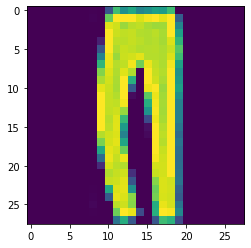

In [20]:
image = tf.cast(test_x[2] * 255.0, tf.uint8)
image = tf.squeeze(image).numpy()
plt.imshow(image)

In [8]:
import pathlib

In [9]:
#export the saved model
export_dir = './tmp/saved_model/'
tf.saved_model.save(model, export_dir=export_dir)

#converting model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

#Save the model
tflite_model_file = pathlib.Path('/tmp/foo.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: ./tmp/saved_model/assets


1034880

In [10]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [16]:
try:
    from google.colab import files
    
    files.download(tflite_model_file)
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
files.download('label.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
test_x[0:20].shape

(20, 28, 28, 1)

In [43]:
from PIL import Image

for index, image in enumerate(test_x[0:20]):
  label = class_names[test_y[index]]
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('./test_images_vd_labels/{}_{}.jpg'.format(index, label))

In [37]:
!ls test_images_vd_labels

'Ankle boot.jpg'   Coat.jpg    Pullover.jpg   Shirt.jpg     Trouser.jpg
 Bag.jpg	   Dress.jpg   Sandal.jpg     Sneaker.jpg   T-shirt_top.jpg


In [38]:
!zip -qq fmnist_test_images.zip -r test_images_vd_labels/

In [40]:
from google.colab import files
files.download('fmnist_test_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>